In [1]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib
import matplotlib.pyplot as plt

In [2]:
#Importing packages
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn import preprocessing

In [3]:
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
os.chdir("/data")

In [5]:
#Reading the data
ML_data= pd.read_csv("./Original data/ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original data/Raw_data.csv',index_col=0)
Raw_data['Hydrogel-forming ability']=np.where(Raw_data['Hydrogel-forming ability']=='Gelator', 1, 0)
#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(71, 4175)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [6]:
X_NAomit_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)
X_NAomit_data

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Tang_2019_DideoxyC,211.25,7.544643,16.8426,28.7053,17.1876,32.1991,0.601521,1.025189,0.613843,1.149968,...,0.0,0.0,0.0,0.0,12.0,0.800000,6.00,0.400000,13.597226,7.439730
Peters_2014_3,268.26,8.653548,19.7668,32.5781,19.3409,35.7010,0.637639,1.050906,0.623900,1.151645,...,0.0,0.0,0.0,5.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182


In [7]:
col_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)

In [31]:
X=np.array(X_NAomit_data)

In [32]:
y=Raw_data['Hydrogel-forming ability']

In [33]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# 1. LASSO

In [34]:
model = make_pipeline(StandardScaler(), LassoCV(cv=Cv_model)).fit(X, y)

warnings.simplefilter("always") 

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e-03, tolerance: 1.421e-03
  model = cd_fast.enet_coordinate_descent(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e-03, tolerance: 1.421e-03
  model = cd_fast.enet_coordinate_descent(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.07

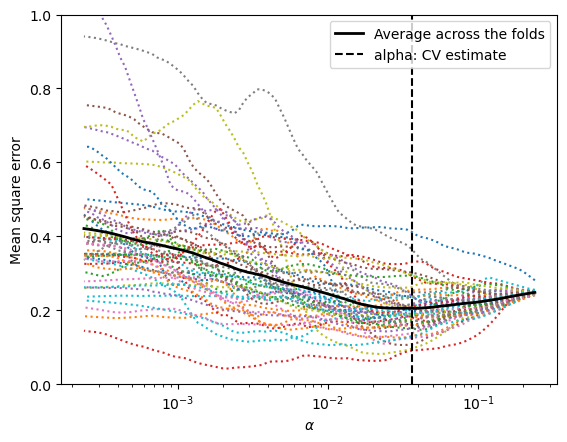

In [35]:
ymin, ymax =0, 1
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()


In [36]:
lasso.alpha_

0.03623607861465868

In [37]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [38]:
lsvc =  Lasso(alpha=lasso.alpha_).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.920e+00, tolerance: 1.766e-03
  model = cd_fast.enet_coordinate_descent(


(71, 70)

In [39]:
lasso_coef=pd.DataFrame(lsvc.coef_)
lasso_coef.index=X_NAomit_data.columns
lasso_coef.columns=["coef"]
lasso_coef


,coef
MW,0.0
AMW,-0.0
Sv,0.0
Se,0.0
Sp,0.0
...,...
s34_relSize,0.0
s34_phSize,-0.0
s34_phRelSize,-0.0
chiralMoment,0.0


In [42]:
lasso_coef_last=lasso_coef[(lasso_coef["coef"]>0)|(lasso_coef["coef"]<0)]
lasso_coef_last.to_csv("./Results/Supplementary Data S6.csv",sep=',')
lasso_coef_last.head()

,coef
D/Dtr05,-0.001202
D/Dtr06,0.002271
D/Dtr09,-0.008761
ZM1Mad,0.000764
ZM1Per,0.000583


In [43]:
Lasso_data=X_NAomit_data[X_NAomit_data.columns[model.get_support()]]
Lasso_data

,D/Dtr05,D/Dtr06,D/Dtr09,ZM1Mad,ZM1Per,ZM2Per,CENT,SMTI,GMTIV,CSI,...,P_VSA_charge_6,P_VSA_charge_7,P_VSA_charge_8,P_VSA_charge_9,P_VSA_charge_10,T(N..O),T(O..O),T(O..F),F05[C-N],SAtot
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,79.738154,44.396318,66.871159,123.123376,465.73,492.95,383.0,2886.0,10547.0,288.0,...,0.000000,0.000000,0.000000,70.626612,42.923526,118.0,21.0,0.0,6.0,341.796154
Ma_2019_U,45.292352,53.643579,0.000000,107.361029,431.84,414.09,295.0,2084.0,8734.0,240.0,...,0.000000,0.000000,18.523668,94.168816,0.000000,46.0,77.0,0.0,2.0,332.147792
Ma_2019_C,45.292352,53.643579,0.000000,106.229031,412.07,408.23,295.0,2084.0,7972.0,240.0,...,0.000000,9.476247,9.047420,94.168816,2.327920,74.0,43.0,0.0,3.0,336.298102
Ma_2019_G,85.493024,47.162191,71.547747,132.059311,511.55,534.91,446.0,3270.0,12768.0,305.0,...,0.000000,0.000000,0.000000,70.626612,20.389695,135.0,51.0,0.0,7.0,353.277651
Ma_2019_dA,74.565443,41.842288,63.146800,115.019665,425.91,455.75,336.0,2584.0,8812.0,275.0,...,0.000000,0.000000,26.076736,58.855510,42.923526,91.0,10.0,0.0,6.0,313.418445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,45.292352,53.643579,0.000000,106.229031,412.07,408.23,295.0,2084.0,7972.0,240.0,...,0.000000,9.476247,9.047420,94.168816,2.327920,74.0,43.0,0.0,3.0,336.298102
Tang_2019_DideoxyC,38.692352,46.741306,0.000000,90.021608,333.09,337.91,213.0,1585.0,5062.0,212.0,...,0.000000,14.545311,56.131828,70.626612,2.327920,41.0,14.0,0.0,3.0,279.542683
Peters_2014_3,79.738154,44.396318,66.871159,124.255374,486.06,501.59,383.0,2886.0,11275.0,288.0,...,0.000000,0.000000,0.000000,79.245205,32.160797,101.0,51.0,0.0,5.0,338.871066


In [44]:
Lasso_data.to_csv('./Results/Lasso_data.csv',encoding='utf-8')

In [45]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Lasso_data)
X_scaled_data=Transformer.transform(Lasso_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Lasso_data.columns
X_scaled_data.index=Raw_data.index

joblib.dump(Transformer, './Models/Lasso_Scaler_transformer.pkl')

X_scaled_data

,D/Dtr05,D/Dtr06,D/Dtr09,ZM1Mad,ZM1Per,ZM2Per,CENT,SMTI,GMTIV,CSI,...,P_VSA_charge_6,P_VSA_charge_7,P_VSA_charge_8,P_VSA_charge_9,P_VSA_charge_10,T(N..O),T(O..O),T(O..F),F05[C-N],SAtot
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.079122,0.005287,0.181294,0.166748,0.189792,0.193293,0.026667,0.030815,0.044265,0.040042,...,0.000000,0.000000,0.000000,0.091908,1.000000,0.250784,0.054187,0.0,0.12500,0.098400
Ma_2019_U,0.012722,0.024427,0.000000,0.087346,0.141300,0.094976,0.012863,0.011819,0.029633,0.014752,...,0.000000,0.000000,0.044637,0.183816,0.000000,0.025078,0.330049,0.0,0.00000,0.083150
Ma_2019_C,0.012722,0.024427,0.000000,0.081644,0.113011,0.087670,0.012863,0.011819,0.023484,0.014752,...,0.000000,0.206211,0.021802,0.183816,0.054234,0.112853,0.162562,0.0,0.03125,0.089710
Ma_2019_G,0.090215,0.011012,0.193972,0.211762,0.255355,0.245605,0.036549,0.039910,0.062188,0.048999,...,0.000000,0.000000,0.000000,0.091908,0.475024,0.304075,0.201970,0.0,0.15625,0.116549
Ma_2019_dA,0.069151,0.000000,0.171197,0.125926,0.132814,0.146914,0.019294,0.023662,0.030263,0.033193,...,0.000000,0.000000,0.062838,0.045954,1.000000,0.166144,0.000000,0.0,0.12500,0.053545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,0.012722,0.024427,0.000000,0.081644,0.113011,0.087670,0.012863,0.011819,0.023484,0.014752,...,0.000000,0.206211,0.021802,0.183816,0.054234,0.112853,0.162562,0.0,0.03125,0.089710
Tang_2019_DideoxyC,0.000000,0.010140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.316518,0.135262,0.091908,0.054234,0.009404,0.019704,0.0,0.03125,0.000000
Peters_2014_3,0.079122,0.005287,0.181294,0.172450,0.218882,0.204064,0.026667,0.030815,0.050140,0.040042,...,0.000000,0.000000,0.000000,0.125555,0.749258,0.197492,0.201970,0.0,0.09375,0.093777


In [46]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [48]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [49]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Hydrogel-forming ability'].values

## 1.1 DT

In [66]:
clf=DecisionTreeClassifier(random_state=0)

In [67]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676190,0.013877
Accuracy_train,0.978164,0.001539
F1 Score,0.695797,0.014569
Precision,0.704834,0.014202
Recall,0.711429,0.022511
Roc_auc,0.679413,0.013723


In [68]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=12, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 00:58:30,028] A new study created in memory with name: no-name-481f4c19-5cdf-4092-a6ed-0716df89bfc0
[I 2024-01-12 00:58:30,051] Trial 0 finished with value: 0.637047619047619 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.637047619047619.
[I 2024-01-12 00:58:30,074] Trial 1 finished with value: 0.6478095238095238 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 1 with value: 0.6478095238095238.
[I 2024-01-12 00:58:30,098] Trial 2 finished with value: 0.5834285714285714 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 1 with value: 0.6478095238095238.
[I 2024-01-12 00:58:30,121] Trial 3 finished with value: 0.6131428571428572 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 1 with value: 0.6478095238095238.
[I 2024-01-12 00:58:30,144] Trial 4 finished with value: 0.6483809523809524 

In [69]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 3, 'max_features': 16, 'min_samples_split': 4}


In [70]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.679524,0.015475
Accuracy_train,0.864461,0.006715
F1 Score,0.716752,0.015407
Precision,0.688970,0.016964
Recall,0.776786,0.023767
Roc_auc,0.687844,0.018509


In [72]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/DT_model_lasso_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676190  0.013877  0.679524  0.015475
Accuracy_train  0.978164  0.001539  0.864461  0.006715
F1 Score        0.695797  0.014569  0.716752  0.015407
Precision       0.704834  0.014202  0.688970  0.016964
Recall          0.711429  0.022511  0.776786  0.023767
Roc_auc         0.679413  0.013723  0.687844  0.018509

## 1.2 LR

In [73]:
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

In [74]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.650667,0.013512
Accuracy_train,0.780627,0.004924
F1 Score,0.717158,0.012260
Precision,0.636606,0.011612
Recall,0.840000,0.020861
Roc_auc,0.674107,0.019188


In [75]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 00:59:06,798] A new study created in memory with name: no-name-9e95e664-b92a-4da6-9924-4e9161c0ebea
[I 2024-01-12 00:59:08,355] Trial 0 finished with value: 0.6422857142857142 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6422857142857142.
[I 2024-01-12 00:59:08,380] Trial 1 finished with value: 0.6323809523809524 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.6422857142857142.
[I 2024-01-12 00:59:08,404] Trial 2 finished with value: 0.5856190476190476 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.6422857142857142.
[I 2024-01-12 00:59:08,427] Trial 3 finished with value: 0.658952380952381 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.6589523809

In [76]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 912.2207863473513, 'l1_ratio': 0.6623431782063935, 'max_iter': 845}


In [77]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.704571,0.017062
Accuracy_train,0.977462,0.001576
F1 Score,0.732877,0.017040
Precision,0.717844,0.019672
Recall,0.772857,0.023079
Roc_auc,0.741633,0.019542


In [78]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/LR_model_lasso_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.650667  0.013512  0.704571  0.017062
Accuracy_train  0.780627  0.004924  0.977462  0.001576
F1 Score        0.717158  0.012260  0.732877  0.017040
Precision       0.636606  0.011612  0.717844  0.019672
Recall          0.840000  0.020861  0.772857  0.023079
Roc_auc         0.674107  0.019188  0.741633  0.019542

## 1.3 RF

In [79]:
clf=RandomForestClassifier(random_state=0)

In [80]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.648000,0.014535
Accuracy_train,0.978164,0.001539
F1 Score,0.675897,0.015271
Precision,0.667234,0.013517
Recall,0.705714,0.022288
Roc_auc,0.750370,0.016641


In [81]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 01:00:31,398] A new study created in memory with name: no-name-f2e69fc9-08d5-4012-9d79-2c0c2ab98733
[I 2024-01-12 01:00:34,693] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:00:37,203] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:00:42,373] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:00:45,570] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [82]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 964, 'max_depth': 7, 'max_features': 26, 'min_impurity_decrease': 0.021851274789025533}


In [83]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.642286,0.014344
Accuracy_train,0.977112,0.001592
F1 Score,0.676622,0.015551
Precision,0.656327,0.013317
Recall,0.722143,0.023702
Roc_auc,0.726709,0.016915


In [84]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/RF_model_lasso_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.648000  0.014535  0.642286  0.014344
Accuracy_train  0.978164  0.001539  0.977112  0.001592
F1 Score        0.675897  0.015271  0.676622  0.015551
Precision       0.667234  0.013517  0.656327  0.013317
Recall          0.705714  0.022288  0.722143  0.023702
Roc_auc         0.750370  0.016641  0.726709  0.016915

## 1.4 XGBoost

In [98]:
clf=xgb.XGBClassifier(random_state=0)

In [85]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.642286,0.014344
Accuracy_train,0.977112,0.001592
F1 Score,0.676622,0.015551
Precision,0.656327,0.013317
Recall,0.722143,0.023702
Roc_auc,0.726709,0.016915


In [86]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:09:41,860] A new study created in memory with name: no-name-0beaa45a-9912-43a8-95cf-0e73848f967f
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [87]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.262599937791131, 'alpha': 0.003699202202542825, 'colsample_bytree': 0.4, 'subsample': 0.7000000000000001, 'learning_rate': 0.1901, 'n_estimators': 433}


In [88]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.672095,0.016234
Accuracy_train,0.978164,0.001539
F1 Score,0.707779,0.014983
Precision,0.682626,0.015459
Recall,0.753571,0.021375
Roc_auc,0.742781,0.016832


In [89]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/XGB_model_lasso_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.642286  0.014344  0.672095  0.016234
Accuracy_train  0.977112  0.001592  0.978164  0.001539
F1 Score        0.676622  0.015551  0.707779  0.014983
Precision       0.656327  0.013317  0.682626  0.015459
Recall          0.722143  0.023702  0.753571  0.021375
Roc_auc         0.726709  0.016915  0.742781  0.016832

# 2. MLREM

In [90]:
col_data= pd.read_csv("./Results/MLREM_col.csv",header=0,index_col=0)

In [91]:
MRLEM_data=X_NAomit_data[col_data.index]
MRLEM_data

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,66.871159,348.869542,135.0,383.0,2886.0,5576.0,10547.0,5729.0,4739.692713,...,90.763661,139.049917,75.680233,63.202194,1.899093,36.892542,0.0,139.54,160.947217,291.295681
Ma_2019_U,244.23,0.000000,340.039426,118.0,295.0,2084.0,4432.0,8734.0,2194.0,3416.557603,...,139.839496,139.049917,0.000000,48.373245,46.279992,36.205320,0.0,124.78,146.060780,262.840532
Ma_2019_C,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Ma_2019_G,283.28,71.547747,387.546658,144.0,446.0,3270.0,6542.0,12768.0,6578.0,5547.544286,...,117.471961,139.049917,32.387883,80.922082,45.054770,36.939118,0.0,159.51,178.957968,301.046512
Ma_2019_dA,251.28,63.146800,315.599992,128.0,336.0,2584.0,4822.0,8812.0,5068.0,4099.715332,...,52.221046,96.366574,75.680233,63.202194,1.899093,36.335611,0.0,119.31,118.263874,281.544850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Tang_2019_DideoxyC,211.25,0.000000,253.494297,103.0,213.0,1585.0,2963.0,5062.0,1633.0,2398.199373,...,59.519699,53.683231,0.000000,67.057867,3.124314,34.619300,0.0,90.37,75.580531,250.166113
Peters_2014_3,268.26,66.871159,369.000658,135.0,383.0,2886.0,5763.0,11275.0,5729.0,4739.692713,...,100.945467,139.049917,32.387883,87.641582,27.044020,36.892542,0.0,133.49,146.060780,284.468439


In [92]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(MRLEM_data)
X_scaled_data=Transformer.transform(MRLEM_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=MRLEM_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Original data/MRLEM_data_X_scaled_data.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/MRLEM_data_Scaler_transformer.pkl')

X_scaled_data.head()

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.181294,0.193207,0.036281,0.026667,0.030815,0.037803,0.044265,0.024087,0.024617,...,0.176802,0.999046,0.285905,0.104723,0.015761,0.446054,0.0,0.472652,0.769847,0.069993
Ma_2019_U,0.075722,0.000000,0.175319,0.017007,0.012863,0.011819,0.021252,0.029633,0.003299,0.010706,...,0.401921,0.999046,0.000000,0.031193,0.384100,0.311208,0.0,0.330770,0.665700,0.021569
Ma_2019_C,0.073472,0.000000,0.134701,0.017007,0.012863,0.011819,0.018475,0.023484,0.003299,0.010706,...,0.389042,0.999046,0.000000,0.123842,0.025930,0.311208,0.0,0.388926,0.769847,0.033187
Ma_2019_G,0.165381,0.193972,0.271557,0.046485,0.036549,0.039910,0.051778,0.062188,0.029080,0.033111,...,0.299317,0.999046,0.122355,0.192589,0.373931,0.455193,0.0,0.664616,0.895853,0.086587
Ma_2019_dA,0.091909,0.171197,0.125811,0.028345,0.019294,0.023662,0.026894,0.030263,0.020200,0.017889,...,0.000000,0.666030,0.285905,0.104723,0.015761,0.336774,0.0,0.278189,0.471230,0.053399


In [93]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc'])
    return Model

In [94]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [95]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

## 2.1 DT

In [139]:
clf=DecisionTreeClassifier(random_state=0)

In [96]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.629333,0.015032
Accuracy_train,0.729981,0.004700
F1 Score,0.697627,0.013235
Precision,0.620752,0.011961
Recall,0.811071,0.020893
Roc_auc,0.664796,0.020543


In [97]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:29:56,212] A new study created in memory with name: no-name-6a0b1671-0ec2-4905-98f9-69d2f7e33654
[I 2024-01-12 01:29:57,476] Trial 0 finished with value: 0.6312380952380953 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,505] Trial 1 finished with value: 0.5926666666666667 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,530] Trial 2 finished with value: 0.6375238095238095 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,554] Trial 3 finished with value: 0.6208571428571428 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,579] Trial 4 finished with value: 0.629619047619047

In [100]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 5, 'max_features': 13, 'min_samples_split': 3}


In [102]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [103]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/DT_model_mlrem_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.629333  0.015032  0.680000  0.012329
Accuracy_train  0.729981  0.004700  0.925345  0.005584
F1 Score        0.697627  0.013235  0.706865  0.012092
Precision       0.620752  0.011961  0.698240  0.013460
Recall          0.811071  0.020893  0.735714  0.020076
Roc_auc         0.664796  0.020543  0.690561  0.015281

## 2.2 LR

In [104]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [105]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:33:46,194] A new study created in memory with name: no-name-e4ba7b5b-b8fd-4929-82c3-50137ca4832b
[I 2024-01-12 01:33:46,218] Trial 0 finished with value: 0.6096190476190476 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6096190476190476.
[I 2024-01-12 01:33:46,239] Trial 1 finished with value: 0.6195238095238095 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,262] Trial 2 finished with value: 0.570095238095238 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,284] Trial 3 finished with value: 0.6294285714285714 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.6294285714

In [106]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 1.5684558195868687, 'l1_ratio': 0.51063148634346, 'max_iter': 1863}


In [108]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.632190,0.014648
Accuracy_train,0.735909,0.004541
F1 Score,0.694496,0.013341
Precision,0.627650,0.012121
Recall,0.794643,0.021058
Roc_auc,0.673325,0.020325


In [109]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/LR_model_mlrem_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.680000  0.012329  0.632190  0.014648
Accuracy_train  0.925345  0.005584  0.735909  0.004541
F1 Score        0.706865  0.012092  0.694496  0.013341
Precision       0.698240  0.013460  0.627650  0.012121
Recall          0.735714  0.020076  0.794643  0.021058
Roc_auc         0.690561  0.015281  0.673325  0.020325

## 2.3 RF

In [110]:
clf=RandomForestClassifier(random_state=0)

In [111]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676381,0.014691
Accuracy_train,0.978164,0.001539
F1 Score,0.711877,0.013423
Precision,0.688878,0.014746
Recall,0.757857,0.020561
Roc_auc,0.756424,0.017012


In [112]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 01:35:16,075] A new study created in memory with name: no-name-0e368382-34a5-42fd-91ba-b1b1a0a8e3bf
[I 2024-01-12 01:35:19,314] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:21,908] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:27,120] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:30,335] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [113]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 879, 'max_depth': 9, 'max_features': 28, 'min_impurity_decrease': 0.008123194334826785}


In [115]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.670571,0.013460
Accuracy_train,0.974643,0.001874
F1 Score,0.703054,0.013994
Precision,0.681364,0.014131
Recall,0.749643,0.022551
Roc_auc,0.752985,0.015938


In [116]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/RF_model_mlrem_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676381  0.014691  0.670571  0.013460
Accuracy_train  0.978164  0.001539  0.974643  0.001874
F1 Score        0.711877  0.013423  0.703054  0.013994
Precision       0.688878  0.014746  0.681364  0.014131
Recall          0.757857  0.020561  0.749643  0.022551
Roc_auc         0.756424  0.017012  0.752985  0.015938

## 2.4 XGBoost

In [117]:
clf=xgb.XGBClassifier(random_state=0)

In [118]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.662476,0.016918
Accuracy_train,0.978164,0.001539
F1 Score,0.693483,0.017356
Precision,0.671509,0.015551
Recall,0.737143,0.025112
Roc_auc,0.749660,0.017686


In [119]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:49:39,219] A new study created in memory with name: no-name-9bfd5a88-8b2a-4996-844c-9f159bf96100
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [120]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0013221304985698086, 'alpha': 0.02305461805888264, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.15009999999999998, 'n_estimators': 884}


In [121]:
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.682000,0.015467
Accuracy_train,0.978164,0.001539
F1 Score,0.710276,0.015000
Precision,0.693874,0.013624
Recall,0.748214,0.023279
Roc_auc,0.752117,0.018448


In [123]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/XGB_model_mlrem_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.662476  0.016918  0.682000  0.015467
Accuracy_train  0.978164  0.001539  0.978164  0.001539
F1 Score        0.693483  0.017356  0.710276  0.015000
Precision       0.671509  0.015551  0.693874  0.013624
Recall          0.737143  0.025112  0.748214  0.023279
Roc_auc         0.749660  0.017686  0.752117  0.018448